<a href="https://colab.research.google.com/github/pedsrc/data_science/blob/master/Analisando_os_Dados_do_Airbnb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img alt="Colaboratory logo" width="15%" src="https://raw.githubusercontent.com/carlosfab/escola-data-science/master/img/novo_logo_bg_claro.png">

#### **Data Science na Prática 2.0**
*by [sigmoidal.ai](https://sigmoidal.ai)*

---

# Análise dos Dados do Airbnb - *Vancouver*

O [Airbnb](https://www.airbnb.com.br/) já é considerado como sendo a **maior empresa hoteleira da atualidade**. Ah, o detalhe é que ele **não possui nenhum hotel**!

Conectando pessoas que querem viajar (e se hospedar) com anfitriões que querem alugar seus imóveis de maneira prática, o Airbnb fornece uma plataforma inovadora para tornar essa hospedagem alternativa.

No final de 2018, a Startup fundada 10 anos atrás, já havia **hospedado mais de 300 milhões** de pessoas ao redor de todo o mundo, desafiando as redes hoteleiras tradicionais.

Uma das iniciativas do Airbnb é disponibilizar dados do site, para algumas das principais cidades do mundo. Por meio do portal [Inside Airbnb](http://insideairbnb.com/get-the-data.html), é possível baixar uma grande quantidade de dados para desenvolver projetos e soluções de *Data Science*.

<center><img alt="Analisando Airbnb" width="10%" src="https://www.area360.com.au/wp-content/uploads/2017/09/airbnb-logo.jpg"></center>

**Neste *notebook*, seram analisdados os dados referentes à cidade de Vancouver, CA, e ver quais insights podem ser extraídos a partir de dados brutos.**

## Obtenção dos Dados

Os dados utilizados para essa análise foram extraidos do site [Inside Airbnb](http://insideairbnb.com/get-the-data.html), dados esses disponibilizados publicamente pela Airbnb.

O arquivo de dados utilizado para estudo foi o seguinte:
* `listings.csv` - *Summary information and metrics for listings in Vancouver (good for visualisations).*


In [1]:
# importar os pacotes necessarios
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
# importar o arquivo listings.csv para um DataFrame
df = pd.read_csv('http://data.insideairbnb.com/canada/bc/vancouver/2020-05-11/visualisations/listings.csv')

## Análise dos Dados

O objetivo nessa etapa é verificar como os dados estão estruturados, e adaptá-los para a criação de análises impactantes.

**Dicionário das variáveis**

* `id` - número de id gerado para identificar o imóvel
* `name` - nome da propriedade anunciada
* `host_id` - número de id do proprietário (anfitrião) da propriedade
* `host_name` - Nome do anfitrião
* `neighbourhood_group` - esta coluna não contém nenhum valor válido
* `neighbourhood` - nome do bairro
* `latitude` - coordenada da latitude da propriedade
* `longitude` - coordenada da longitude da propriedade
* `room_type` - informa o tipo de quarto que é oferecido
* `price` - preço para alugar o imóvel
* `minimum_nights` - quantidade mínima de noites para reservar
* `number_of_reviews` - número de reviews que a propriedade possui
* `last_review` - data do último review
* `reviews_per_month` - quantidade de reviews por mês
* `calculated_host_listings_count` - quantidade de imóveis do mesmo anfitrião
* `availability_365` - número de dias de disponibilidade dentro de 365 dias

Antes de iniciar qualquer análise, será verificado a cara do nosso *dataset*, analisando as 5 primeiras entradas.

In [3]:
# mostrar as 5 primeiras entradas
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,10080,D1 - Million Dollar View 2 BR,30899,Rami,NaN,Downtown,49.28772,-123.12110,Entire home/apt,151,90,16,2017-02-26,0.15,49,347
1,13188,Garden level studio in ideal loc.,51466,Family Guns,NaN,Riley Park,49.24577,-123.10516,Entire home/apt,120,2,242,2020-04-30,1.94,1,211
2,13357,! Wow! 2bed 2bath 1bed den Harbour View Apartm...,52118,Liliana,NaN,Downtown Eastside,49.27955,-123.10546,Entire home/apt,161,30,58,2020-03-24,0.47,3,335
3,13358,Monthly (or Longer ) Designer One Bedroom Down...,52116,Lynn,NaN,West End,49.28209,-123.12515,Entire home/apt,70,30,427,2019-08-04,3.54,1,57
4,13490,Vancouver's best kept secret,52467,Iris,NaN,Kensington-Cedar Cottage,49.25550,-123.06696,Entire home/apt,145,30,85,2020-04-18,0.78,1,326


### **Q1. Quantos atributos (variáveis) e quantas entradas o nosso conjunto de dados possui? Quais os tipos das variáveis?**

Para proseguir com a análise é interessante verificar a quantidade de dados que estão sendo trabalhados, e o tipo de cada dado, separado por colunas.

O dataset utilizado é um resumo da airbnb (`listings.csv`). Um dataset mais completo também está disponível no [Inside Airbnb](http://insideairbnb.com/get-the-data.html) (`listings.csv.gz`).

In [4]:
# identificar o volume de dados do DataFrame
print('Entradas:\t {}'.format(df.shape[0]))
print('Entradas:\t {}\n'.format(df.shape[1]))

# verificar as 5 primeiras entradas do dataset
display(df.dtypes)

Entradas:	 5806
Entradas:	 16



id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group               float64
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object

### **Q2. Qual a porcentagem de valores ausentes no *dataset*?**

Para uma melhor análise, é muito importante ter um dataset de qualidade, isso inclui verificar os valores ausentes e se esses valores são relevantes.

* É possível ver que a coluna `neighbourhood_group` possui 100% dos seus valores faltantes. 
* As variáveis `reviews_per_month` e `last_review` possuem valores nulos em quase metade das linhas.
* As variáveis `name` e `host_name` têm aproximadamente 0,1% dos valores nulos.

In [6]:
# ordenar em ordem decrescente as variáveis por seus valores ausentes
(df.isnull().sum() / df.shape[0]).sort_values(ascending=False)


neighbourhood_group               1.000000
reviews_per_month                 0.149501
last_review                       0.149501
name                              0.000172
availability_365                  0.000000
calculated_host_listings_count    0.000000
number_of_reviews                 0.000000
minimum_nights                    0.000000
price                             0.000000
room_type                         0.000000
longitude                         0.000000
latitude                          0.000000
neighbourhood                     0.000000
host_name                         0.000000
host_id                           0.000000
id                                0.000000
dtype: float64

### **Q3. Qual o tipo de distribuição das variáveis?** 

Para verificar a distribuição das variáveis é importante plotar o histograma, verificar se os valores estão dentro de um range aceitável para serem analisados e caso seja preciso, atualizar o histograma eliminando os outliers.

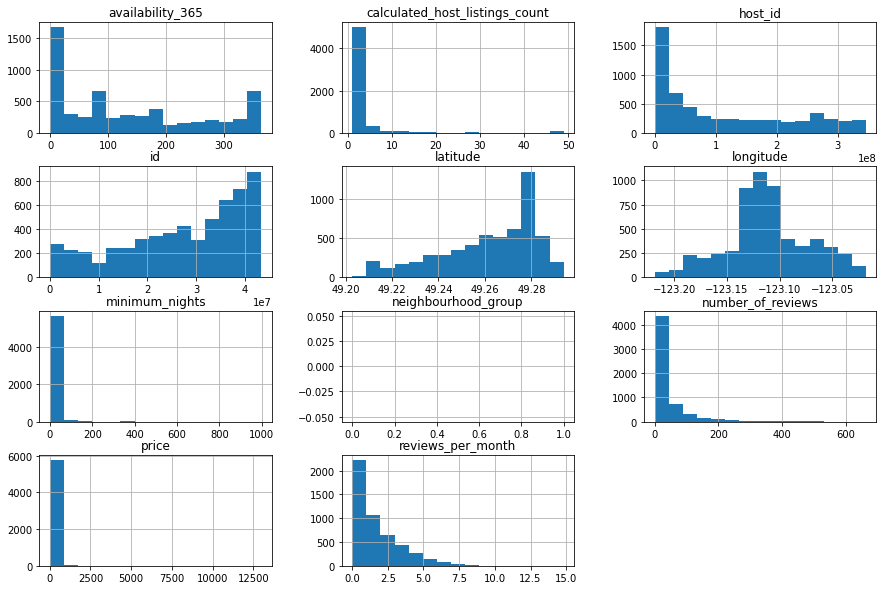

In [7]:
# plotar o histograma das variáveis numéricas
df.hist(bins=15, figsize=(15,10));

In [8]:
# ver o resumo estatístico das variáveis numéricas
df[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month',
    'calculated_host_listings_count', 'availability_365']].describe()

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,5806.000000,5806.00000,5806.000000,4938.000000,5806.000000,5806.000000
mean,174.295040,14.15794,35.012745,1.724563,3.598691,137.496900
std,266.424203,34.78132,56.734073,1.667647,7.162984,126.036135
min,13.000000,1.00000,0.000000,0.010000,1.000000,0.000000
25%,85.000000,1.00000,2.000000,0.430000,1.000000,6.250000
50%,125.000000,3.00000,13.000000,1.170000,1.000000,102.000000
75%,200.000000,30.00000,44.000000,2.560000,3.000000,244.000000
max,12999.000000,998.00000,662.000000,14.820000,49.000000,365.000000


Analisando a variável `price`, é possível verificar uma dispersão no valor de preço máximo, que chega a ser 12999 dólares enquanto o 75% dos valores estão abaixo de 200 dólares.
Há também uma dispersão nos valores de noites mínimas(`minimum_nights`) que chega a ultrapassar 998 dias.

Já que foram verificados outliers nas variáveis `price` e `minimum_nights`, é preciso gerar um novo histograma.

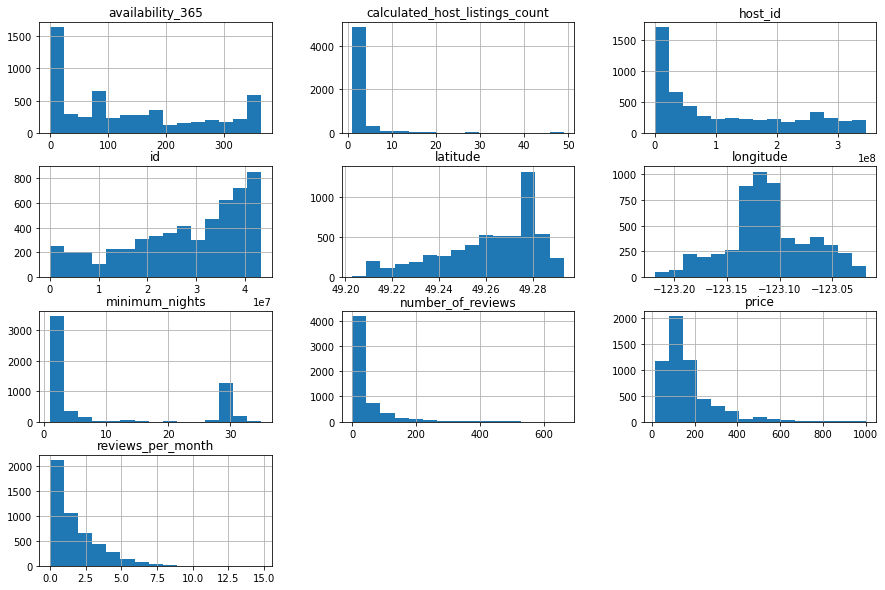

In [13]:
# remover os *outliers* em um novo DataFrame
df_clean = df.copy()
df_clean.drop(df_clean[df_clean.price > 1000].index, axis=0, inplace=True)
df_clean.drop(df_clean[df_clean.minimum_nights > 40].index, axis=0, inplace=True)

# remover `neighbourhood_group`, pois está vazio
df_clean.drop('neighbourhood_group', axis=1, inplace=True)

# plotar o histograma para as variáveis numéricas
df_clean.hist(bins=15, figsize= (15,10));

### **Q4. Qual a média dos preços de aluguel?**

Para verificar a média de preço dos alugueis será gerado novamente uma tabela de resumo estatístico da variável `price`, com os dados tratados.

In [16]:
# ver a média da coluna `price``

df_clean[['price']].describe()


,price
count,5605.000000
mean,164.001963
std,127.401357
min,13.000000
25%,85.000000
50%,125.000000
75%,200.000000
max,1000.000000


### **Q4. Qual a correlação existente entre as variáveis**

A correlação significa a relação entre as variáveis.

Com o coeficiente de correlação é possível verificar a insidade dessas relações, para verificar essas correlações, é interessante:

* Criar uma matriz de correlação
* Gerar um heatmap a partir dessa matriz, utilizando a biblioteca `seaborn`

In [18]:
# criar uma matriz de correlação
corr = df_clean[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month',
    'calculated_host_listings_count', 'availability_365']].corr()

# mostrar a matriz de correlação
display(corr)


,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
price,1.000000,-0.113932,-0.087849,-0.034192,-0.110771,0.059738
minimum_nights,-0.113932,1.000000,-0.149546,-0.296889,0.236151,0.170225
number_of_reviews,-0.087849,-0.149546,1.000000,0.672124,-0.149955,0.054414
reviews_per_month,-0.034192,-0.296889,0.672124,1.000000,-0.171986,0.021027
calculated_host_listings_count,-0.110771,0.236151,-0.149955,-0.171986,1.000000,0.094490
availability_365,0.059738,0.170225,0.054414,0.021027,0.094490,1.000000


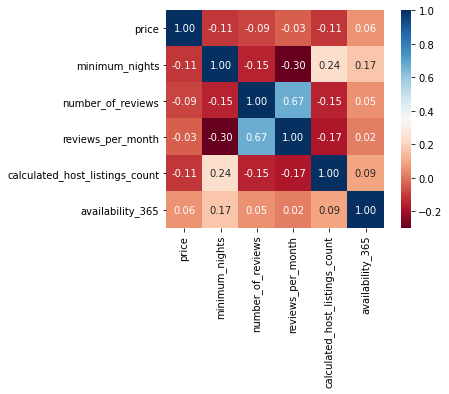

In [19]:
# plotar um heatmap a partir das correlações
sns.heatmap(corr, cmap='RdBu', fmt='.2f', square=True, linecolor='white', annot=True);

### **Q5. Qual o tipo de imóvel mais alugado em Vancouver?**

 A variável `room_type` indica o tipo de locação que está anunciada na Airbnb. Podendo ser, casa/apartamentos inteiros, só com um quarto, entre outros.

 Será feita a contagem das ocorrências de cada tipo de aluguel, usando `value_counts()`.

In [20]:
# mostrar a quantidade de cada tipo de imóvel disponível
df_clean.room_type.value_counts()

Entire home/apt    4075
Private room       1467
Shared room          50
Hotel room           13
Name: room_type, dtype: int64

In [21]:
# mostrar a porcentagem de cada tipo de imóvel disponível
df_clean.room_type.value_counts() / df_clean.shape[0]

Entire home/apt    0.727029
Private room       0.261731
Shared room        0.008921
Hotel room         0.002319
Name: room_type, dtype: float64

### **Q6. Qual a localidade mais cara do dataset?**

Para se comparar duas variáveis pode-se usar a função `groupby()`. Nesse caso, será comparado os bairros (`neighbourhood`) a partir do preço de locação.

Posteriormente, será plotado um gráfico com a Latitude e Longitude dos locais, mostrando realmente as áreas com maior oferta e preços.

In [22]:
# ver preços por bairros, na média
df_clean.groupby(['neighbourhood']).price.mean().sort_values(ascending=False)[:10]

neighbourhood
Downtown             200.624151
Kitsilano            194.651709
Downtown Eastside    185.427119
Dunbar Southlands    182.132911
West Point Grey      177.718447
Shaughnessy          169.469880
Mount Pleasant       166.022581
South Cambie         165.464286
West End             162.685714
Arbutus Ridge        160.420000
Name: price, dtype: float64

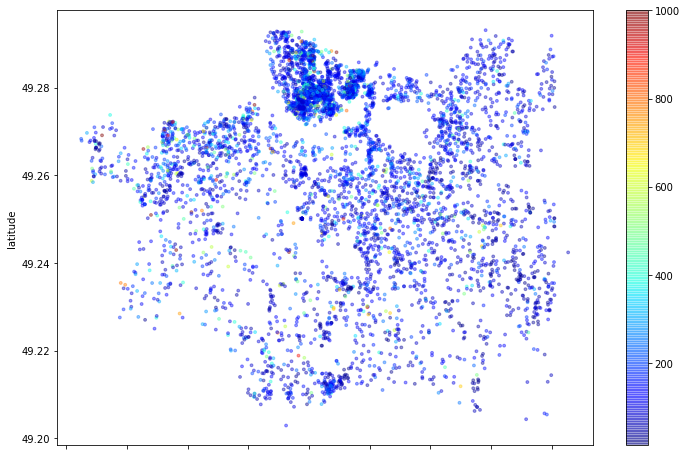

In [25]:
# plotar os imóveis pela latitude-longitude
df_clean.plot(kind="scatter", x='longitude', y='latitude', alpha=0.4, c=df_clean['price'], s=8,
              cmap=plt.get_cmap('jet'), figsize=(12,8));


### **Q7. Qual é a média do mínimo de noites para aluguel (minimum_nights)?**

Para verificar a média de preço dos alugueis será gerado novamente uma tabela de resumo estatístico da variável `minumum_nights`, com os dados tratados.

In [17]:
# ver a média da coluna `minimum_nights``
df_clean[['minimum_nights']].describe()

,minimum_nights
count,5605.000000
mean,9.991079
std,12.411036
min,1.000000
25%,1.000000
50%,3.000000
75%,30.000000
max,35.000000


## Conclusões


Após a análise realizada dos dados da Airbnb de Vancouver, foi possível verificar a presença de alguns outliers e dados vazios, exigindo o tratamento dos dados.

É interessante observar que em Vancouver há muitas casas para aluguel com período mínimo de um mês, mostrando que essa é uma cidade muito procurada para se morar.

É importante também observar que em algumas localidades existem poucos imóveis disponíveis, isso pode prejudicar um pouco a análise, distorcendo as informações.

Lembrando, que esse é um dataset resumido, para uma análise mais profunda é possível utilizar o dataset com 106 atributos disponibilizado pela Airbnb.